In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from random import randrange
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#importing the dataset

data = pd.read_csv("data.csv")
print(data.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0   0     115.26     115.87     118.55     115.80  
1   1      78.13      78.25      79.25      79.19  
2   0      79.84      80.69      80.76      80.97  
3   1      84.32      89.90      86.75      85.58  
4   0     115.13     121.98     122.73     114.81  


In [4]:
#Calculating  the average of four runs as the target variable
columns = ['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']
df = data[columns].to_numpy()
a= df.mean(axis = 1)
#data.head()

#Removing the last 4 run columns
datax = data.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis = 1)
#datax.head()
datax['Runs'] = a

In [53]:
#Correlation matrix
corr = datax.iloc[:,0:10].corr().round(4)
corr.style.background_gradient(cmap='RdBu', axis= None).set_precision(2)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
MWG,1,0.0006,0.0093,0.11,-0.0086,0.16,0.015,0,0.35,-0.0008
NWG,0.0006,1,0.0093,-0.0086,0.11,0.015,0.16,0,-0.0008,0.35
KWG,0.0093,0.0093,1,0.15,0.15,-0.035,-0.035,-0,-0.012,-0.012
MDIMC,0.11,-0.0086,0.15,1,-0.21,0.2,0.085,-0,-0.13,0.011
NDIMC,-0.0086,0.11,0.15,-0.21,1,0.085,0.2,-0,0.011,-0.13
MDIMA,0.16,0.015,-0.035,0.2,0.085,1,0.088,-0,-0.2,-0.019
NDIMB,0.015,0.16,-0.035,0.085,0.2,0.088,1,-0,-0.019,-0.2
KWI,0,0,-0,-0,-0,-0,-0,1,-0,-0
VWM,0.35,-0.0008,-0.012,-0.13,0.011,-0.2,-0.019,-0,1,0.0012
VWN,-0.0008,0.35,-0.012,0.011,-0.13,-0.019,-0.2,-0,0.0012,1


In [5]:
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(datax.iloc[:,0:14], datax['Runs'], test_size = 0.3, random_state = 0)

In [6]:
#scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)
one_column = np.ones((x_test.shape[0],1))
x_test = np.concatenate((one_column, x_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [14]:
#defining cost function

def costFunction(x_train,y_train,theta):
    tobesummed = np.power(((x_train @ theta.T)-y_train),2)
    return np.sum(tobesummed)/(2 * len(x_train))

In [15]:
# gradient descent algorithm
def gradientDescent(x_train,y_train,theta,iterations,alpha, tol_run ,tolerance):
    cost_train = []
    cost_test = []
    for i in range(iterations):
        theta = theta - (alpha/len(x_train)) * np.sum(x_train * (x_train @ theta.T - y_train), axis=0)
        cost = costFunction(x_train, y_train, theta)
        cost_train.append(cost)
        
        cost = costFunction(x_test, y_test, theta)
        cost_test.append(cost)
        
        if tol_run:
            if (i>0) and(abs((cost_train[i]-cost_train[i-1])/cost_train[i-1]) < tolerance).any():
                print("Gradient Descent algorithm converged after", i+1, "Iterations")
                break
            
    
    return theta,cost_train, cost_test

In [16]:
#defining linear regression function
def linear_regression(x_train, y_train, alpha, iterations,tol_run=False, tolerance=10**-5):
    n = x_train.shape[1]
    one_column = np.ones((x_train.shape[0],1))
    x_train = np.concatenate((one_column, x_train), axis = 1)
    theta = np.zeros((1,n+1))
    y_train = np.array(y_train).reshape((y_train.shape[0],1))
    theta, cost_train, cost_test = gradientDescent(x_train,y_train,theta,iterations,alpha, tol_run,tolerance)
    
    return theta,cost_train, cost_test

In [23]:
#defining test function
def test(x_test,theta):
    #scaler = StandardScaler()
    #X_test = scaler.fit_transform(X_test)

    #one_column = np.ones((X_test.shape[0],1))
    #X_test = np.concatenate((one_column, X_test), axis = 1)

    return x_test@theta.T

In [70]:
#Running linear regression for various values of alpha
alpha_val = [0.0001, 0.001, 0.01, 0.1]
train_theta = []
train_cost = []

test_cost = []


for i in range(len(alpha_val)):
    print("\n######---- Iteration with alpha value", alpha_val[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(x_train, y_train, alpha_val[i], 10000, False)
    
    train_theta.append(theta)
    train_cost.append(trainCost)
    
    test_cost.append(testCost)


######---- Iteration with alpha value 0.0001 -----#####

######---- Iteration with alpha value 0.001 -----#####

######---- Iteration with alpha value 0.01 -----#####

######---- Iteration with alpha value 0.1 -----#####


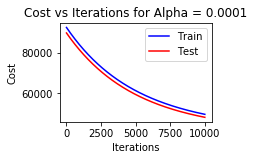

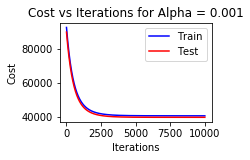

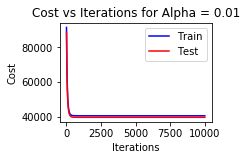

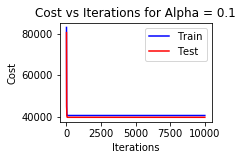

In [71]:
#plotting cost vs iterations plot
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)

ax1.plot(range(len(train_cost[0])),train_cost[0],'-b', label="Train")
ax1.plot(range(len(test_cost[0])),test_cost[0],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.0001")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
plt.show()

fig = plt.figure()

ax1 = fig.add_subplot(2,2,2)

ax1.plot(range(len(train_cost[1])),train_cost[1],'-b', label="Train")
ax1.plot(range(len(test_cost[1])),test_cost[1],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.001")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
plt.show()

fig = plt.figure()

ax1 = fig.add_subplot(2,2,3)

ax1.plot(range(len(train_cost[2])),train_cost[2],'-b', label="Train")
ax1.plot(range(len(test_cost[2])),test_cost[2],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.01")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
plt.show()

fig = plt.figure()

ax1 = fig.add_subplot(2,2,4)

ax1.plot(range(len(train_cost[3])),train_cost[3],'-b', label="Train")
ax1.plot(range(len(test_cost[3])),test_cost[3],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.1")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
plt.show()

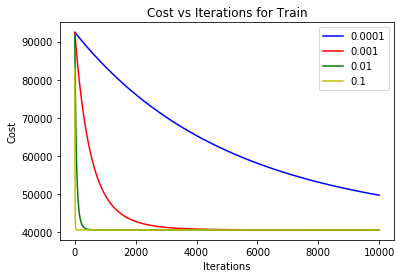

In [19]:
#plotting Cost vs Iterations for Train
fig = plt.figure()

ax2 = fig.add_subplot(1,1,1)

ax2.plot(range(len(train_cost[0])),train_cost[0],'-b', label="0.0001")
ax2.plot(range(len(train_cost[1])),train_cost[1],'-r', label="0.001")
ax2.plot(range(len(train_cost[2])),train_cost[2],'-g', label="0.01")
ax2.plot(range(len(train_cost[3])),train_cost[3],'-y', label="0.1")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Train")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")
plt.show()

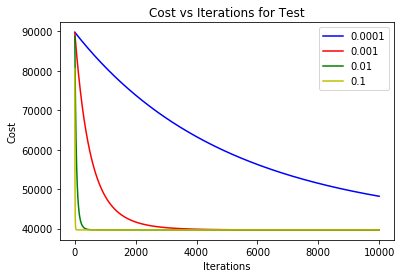

In [20]:
#plotting Cost vs Iterations for Test
fig = plt.figure()

ax2 = fig.add_subplot(1,1,1)

ax2.plot(range(len(test_cost[0])),test_cost[0],'-b', label="0.0001")
ax2.plot(range(len(test_cost[1])),test_cost[1],'-r', label="0.001")
ax2.plot(range(len(test_cost[2])),test_cost[2],'-g', label="0.01")
ax2.plot(range(len(test_cost[3])),test_cost[3],'-y', label="0.1")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Test")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")
plt.show()

In [21]:
alpha_val

[0.0001, 0.001, 0.01, 0.1]

In [25]:
# Prediction for Train and RMSE Train

one_column = np.ones((x_train.shape[0],1))
training_set = np.concatenate((one_column, x_train), axis = 1)

y_prediction = []
for i in range(len(alpha_val)):
    y_pred = test(training_set,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_train = []
for i in range(len(alpha_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    rmse_train.append(rmse)

In [26]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(alpha_val)):
    y_pred = test(x_test,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_test = []
for i in range(len(alpha_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    rmse_test.append(rmse)

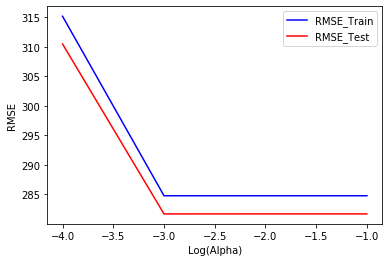

In [28]:
fig = plt.figure()

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(np.log10(alpha_val),rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(np.log10(alpha_val),rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
#rmse_plot.set_title("Cost vs Iterations for Test")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Log(Alpha)")
#rmse_plot.set_xlim([0.001,1])
plt.show()

In [29]:
rmse_train

[315.1876506376328, 284.77722698182737, 284.77591588181133, 284.77591588181133]

In [54]:
print("The best alpha is 0.001")
toler_val = [10**-8, 10**-7, 10**-6, 10**-5, 10**-4]
train_theta = []
train_cost = []

test_cost = []


for i in range(len(toler_val)):
    print("\n######---- Iteration with tolerance value", toler_val[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(x_train, y_train, 0.01, 10000, True, toler_val[i])
    
    train_theta.append(theta)
    train_cost.append(trainCost)
    
    test_cost.append(testCost)

The best alpha is 0.001

######---- Iteration with tolerance value 1e-08 -----#####
Gradient Descent algorithm converged after 1214 Iterations

######---- Iteration with tolerance value 1e-07 -----#####
Gradient Descent algorithm converged after 996 Iterations

######---- Iteration with tolerance value 1e-06 -----#####
Gradient Descent algorithm converged after 778 Iterations

######---- Iteration with tolerance value 1e-05 -----#####
Gradient Descent algorithm converged after 561 Iterations

######---- Iteration with tolerance value 0.0001 -----#####
Gradient Descent algorithm converged after 352 Iterations


In [55]:
# Prediction for Train and RMSE Train

one_column = np.ones((x_train.shape[0],1))
training_set = np.concatenate((one_column, x_train), axis = 1)

y_prediction = []
for i in range(len(toler_val)):
    y_pred = test(training_set,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_train = []
for i in range(len(toler_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    rmse_train.append(rmse)

In [56]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(toler_val)):
    y_pred = test(x_test,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_test = []
for i in range(len(toler_val)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    rmse_test.append(rmse)

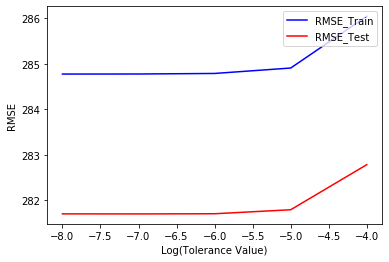

In [57]:
fig = plt.figure()

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(np.log10(toler_val),rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(np.log10(toler_val, ),rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
#rmse_plot.set_title("Cost vs Iterations for Test")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Log(Tolerance Value)")
#rmse_plot.set_xlim([0.001,1])
plt.show()

In [62]:
iters_2 = list(range(100, 1100, 100))
train_theta = []
train_cost = []

test_cost = []


for i in range(len(iters_2)):
    print("\n######---- Iteration = ", iters_2[i],"-----#####")
    
    theta, trainCost, testCost = linear_regression(x_train, y_train, 0.01, iters_2[i])
    
    train_theta.append(theta)
    train_cost.append(trainCost)
    
    test_cost.append(testCost)


######---- Iteration =  100 -----#####

######---- Iteration =  200 -----#####

######---- Iteration =  300 -----#####

######---- Iteration =  400 -----#####

######---- Iteration =  500 -----#####

######---- Iteration =  600 -----#####

######---- Iteration =  700 -----#####

######---- Iteration =  800 -----#####

######---- Iteration =  900 -----#####

######---- Iteration =  1000 -----#####


In [63]:
# Prediction for Train and RMSE Train

one_column = np.ones((x_train.shape[0],1))
training_set = np.concatenate((one_column, x_train), axis = 1)

y_prediction = []
for i in range(len(iters_2)):
    y_pred = test(training_set,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_train = []
for i in range(len(iters_2)):
    rmse = np.sqrt(metrics.mean_squared_error(y_train, y_prediction[i]))
    rmse_train.append(rmse)

In [64]:
#### Prediction for Test and RMSE

y_prediction = []
for i in range(len(iters_2)):
    y_pred = test(x_test,train_theta[i])
    y_prediction.append(y_pred)
    

from sklearn import metrics
rmse_test = []
for i in range(len(iters_2)):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction[i]))
    rmse_test.append(rmse)

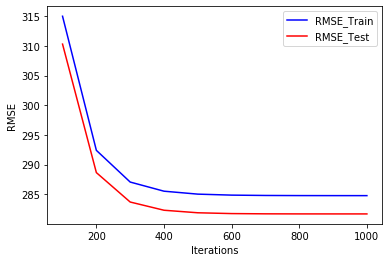

In [65]:
fig = plt.figure()

rmse_plot = fig.add_subplot(1,1,1)

rmse_plot.plot(iters_2,rmse_train,'-b', label='RMSE_Train')
rmse_plot.plot(iters_2,rmse_test,'-r', label='RMSE_Test')
rmse_plot.legend(loc="upper right")
#rmse_plot.set_title("Cost vs Iterations for Test")
rmse_plot.set_ylabel("RMSE")
rmse_plot.set_xlabel("Iterations")
#rmse_plot.set_xlim([0.001,1])
plt.show()

In [ ]:
import random
k = random.sample(range(0, 15), 8)

# defining feature matrix(X) and response vector(y) 
X = gpu.iloc[:,0:8]
y = gpu["avg_run"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [ ]:
print("The best alpha is 0.1")
print("The best tolerance value is 10^-4")

In [ ]:
alpha = 0.1
tolerance = 10**-4
theta_8, trainCost_8, testCost_8 = linear_regression(X_train, y_train,alpha , 10000, True, 10**-4)

In [ ]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_train_pred8 = test(training_set,theta_8)
rmse_train8 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred8))

In [ ]:
y_test = np.array(y_test).reshape((y_test.shape[0],1))
y_test_pred8 = test(X_test,theta_8)
rmse_test8 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred8))

In [ ]:
print(rmse_train8)
print(rmse_test8)

In [ ]:
best_features = [0,1,2,3,4,7,12,13]

In [ ]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:,best_features]
y = df["avg_run"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [ ]:
print("The best alpha is 0.1")
print("The best tolerance value is 10^-4")

In [ ]:
alpha = 0.1
tolerance = 10**-4
theta_best, trainCost_best, testCost_best = linear_regression(X_train, y_train,alpha , 10000, True, 10**-4)

In [ ]:
# Prediction for Train and RMSE Train

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)

y_train_pred_best = test(training_set,theta_best)
rmse_train_best = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_best))

In [ ]:
y_test = np.array(y_test).reshape((y_test.shape[0],1))
y_test_pred_best = test(X_test,theta_8)
rmse_test_best = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_best))

In [ ]:
print(rmse_test_best)
print(rmse_train_best)